In [13]:
%pip install -r requirements.txt



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


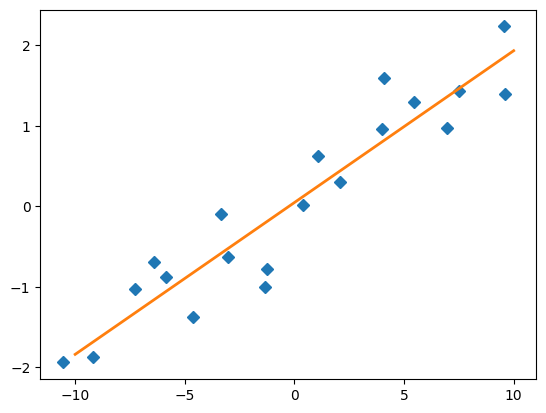

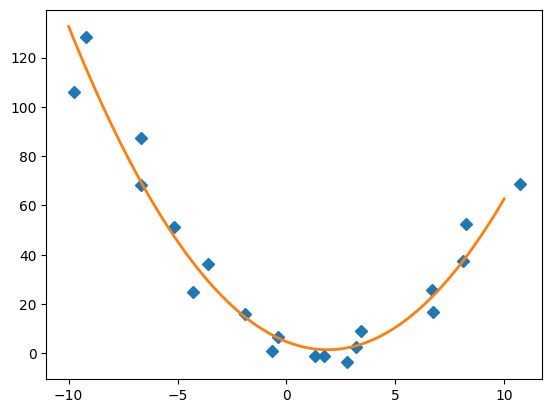

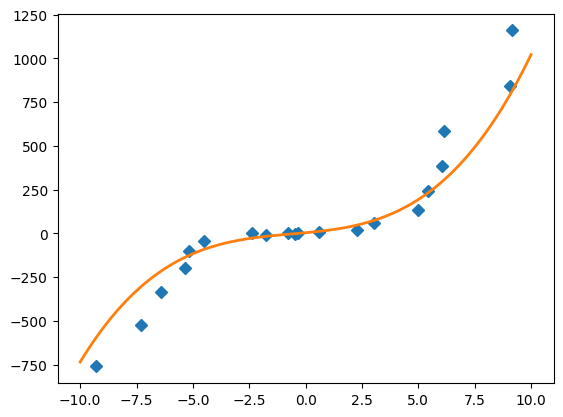

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 20)

delta = 1.5
y1 = 0.2*x + delta*(np.random.rand(20) - 0.5)
x1 = x + delta*(np.random.rand(20) - 0.5)
plt.plot(x1, y1, "D")
m1 = np.vstack([x1, np.ones(20)]).T
a, b = np.linalg.lstsq(m1, y1, rcond=None)[0]
x1_prec = np.linspace(-10, 10, 100)
plt.plot(x1_prec, a * x1_prec + b, "-", lw=2)
plt.show()

delta = 3
y2 = x**2 - 3*x + delta*(np.random.rand(20) - 0.5)
x2 = x + delta*(np.random.rand(20) - 0.5)
plt.plot(x2, y2, "D")
m2 = np.vstack([x2**2, x2, np.ones(20)]).T
a, b, c = np.linalg.lstsq(m2, y2, rcond=None)[0]
x2_prec = np.linspace(-10, 10, 100)
plt.plot(x2_prec, a * x2_prec**2 + b * x2_prec + c, "-", lw=2)
plt.show()

delta = 5
y3 = x**3 + 2*x**2 - 4*x + delta*(np.random.rand(20) - 0.5)
x3 = x + delta*(np.random.rand(20) - 0.5)
plt.plot(x3, y3, "D")
m3 = np.vstack([x2**3, x2**2, x2, np.ones(20)]).T
a, b, c, d = np.linalg.lstsq(m3, y3, rcond=None)[0]
x3_prec = np.linspace(-10, 10, 100)
plt.plot(x3_prec, a * x3_prec**3 + b * x3_prec**2 + c * x3_prec + d, "-", lw=2)
plt.show()

Predicted optimal coefficients: [ 0.35797255 -0.62923526]
Linear deviation: [ 0.0047672  -0.00120824]
Standart deviation: 0.29311889725005397


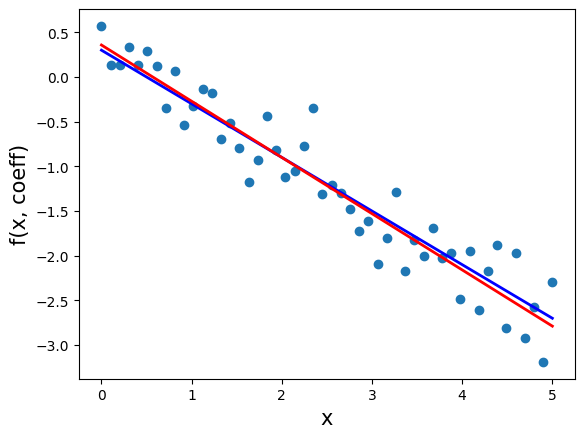

In [15]:
import scipy as sp

def f(x, b0, b1):
    return b0 + b1*x

coeff = (0.3, -0.6)
noise = 0.3
x = np.linspace(0, 5, 50)
y = f(x, *coeff)
y_noisy = y + noise*np.random.randn(len(x))
coeff_opt, coeff_cov = sp.optimize.curve_fit(f, x, y_noisy)
print(f"Predicted optimal coefficients: {coeff_opt}")
lin_dev = sum(coeff_cov)
print(f"Linear deviation: {lin_dev}")
residuals = y_noisy - f(x, *coeff)
sd = (1/len(x) * sum(residuals**2))**0.5
print(f"Standart deviation: {sd}")
plt.scatter(x, y_noisy)
plt.plot(x, y, "b", lw=2) # Actual
plt.plot(x, f(x, *coeff_opt), "r", lw=2) # Predicted
plt.xlabel("x", fontsize=15)
plt.ylabel("f(x, coeff)", fontsize=15)
plt.show()

Predicted optimal coefficients: [ 0.47310527  0.38448804 -0.29541825]
Linear deviation: [ 4.81237069e-03 -1.36682772e-03  3.71050419e-05]
Standart deviation: 0.28494277715425564


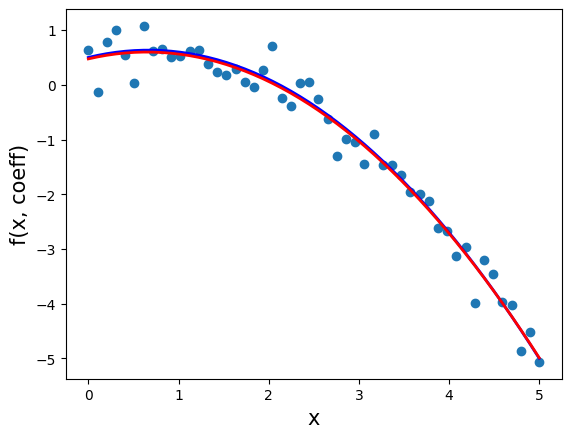

In [16]:
def f(x, b0, b1, b2):
    return b0 + b1*x + b2*x**2

coeff = (0.5, 0.4, -0.3)
noise = 0.3
x = np.linspace(0, 5, 50)
y = f(x, *coeff)
y_noisy = y + noise*np.random.randn(len(x))
coeff_opt, coeff_cov = sp.optimize.curve_fit(f, x, y_noisy)
print(f"Predicted optimal coefficients: {coeff_opt}")
lin_dev = sum(coeff_cov)
print(f"Linear deviation: {lin_dev}")
residuals = y_noisy - f(x, *coeff)
sd = (1/len(x) * sum(residuals**2))**0.5
print(f"Standart deviation: {sd}")
plt.scatter(x, y_noisy)
plt.plot(x, y, "b", lw=2) # Actual
plt.plot(x, f(x, *coeff_opt), "r", lw=2) # Predicted
plt.xlabel("x", fontsize=15)
plt.ylabel("f(x, coeff)", fontsize=15)
plt.show()

Predicted optimal coefficients: [-1.25215247 -2.18770106]
Linear deviation: [0.00396943 0.0023871 ]
Standart deviation: 0.5212010207401969


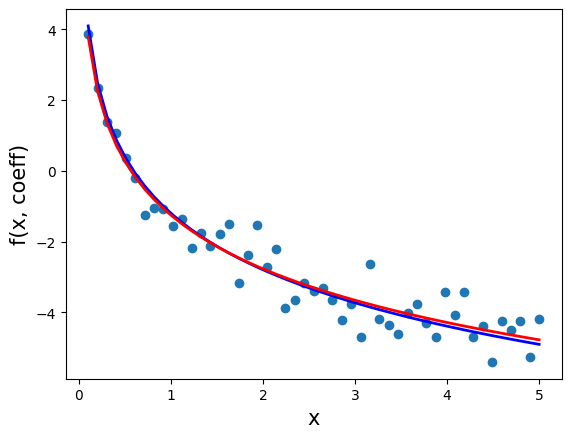

In [17]:
def f(x, b0, b1):
    return b0 + b1*np.log(x)

coeff = (-1.2, -2.3)
noise = 0.6
x = np.linspace(0.1, 5, 49)
y = f(x, *coeff)
y_noisy = y + noise*np.random.randn(len(x))
coeff_opt, coeff_cov = sp.optimize.curve_fit(f, x, y_noisy)
print(f"Predicted optimal coefficients: {coeff_opt}")
lin_dev = sum(coeff_cov)
print(f"Linear deviation: {lin_dev}")
residuals = y_noisy - f(x, *coeff)
sd = (1/len(x) * sum(residuals**2))**0.5
print(f"Standart deviation: {sd}")
plt.scatter(x, y_noisy)
plt.plot(x, y, "b", lw=2) # Actual
plt.plot(x, f(x, *coeff_opt), "r", lw=2) # Predicted
plt.xlabel("x", fontsize=15)
plt.ylabel("f(x, coeff)", fontsize=15)
plt.show()

Predicted optimal coefficients: [-0.3768532  1.2575053]
Linear deviation: [0.00344231 0.00674012]
Standart deviation: 0.20546445188702064


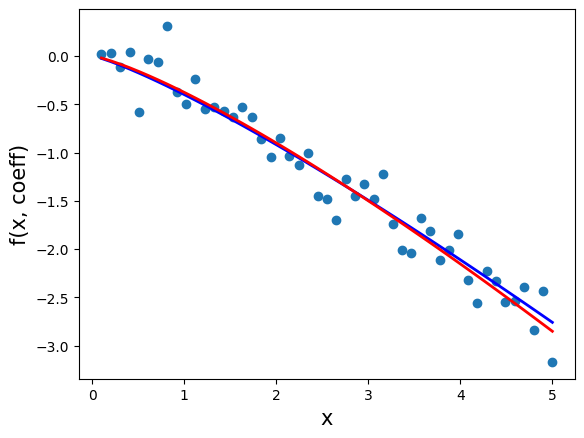

In [18]:
def f(x, b0, b1):
    return b0*x**b1

coeff = (-0.4, 1.2)
noise = 0.2
x = np.linspace(0.1, 5, 49)
y = f(x, *coeff)
y_noisy = y + noise*np.random.randn(len(x))
coeff_opt, coeff_cov = sp.optimize.curve_fit(f, x, y_noisy)
print(f"Predicted optimal coefficients: {coeff_opt}")
lin_dev = sum(coeff_cov)
print(f"Linear deviation: {lin_dev}")
residuals = y_noisy - f(x, *coeff)
sd = (1/len(x) * sum(residuals**2))**0.5
print(f"Standart deviation: {sd}")
plt.scatter(x, y_noisy)
plt.plot(x, y, "b", lw=2) # Actual
plt.plot(x, f(x, *coeff_opt), "r", lw=2) # Predicted
plt.xlabel("x", fontsize=15)
plt.ylabel("f(x, coeff)", fontsize=15)
plt.show()

Intercept: 25522.699259486028
Coefficient: 9217.475268364555


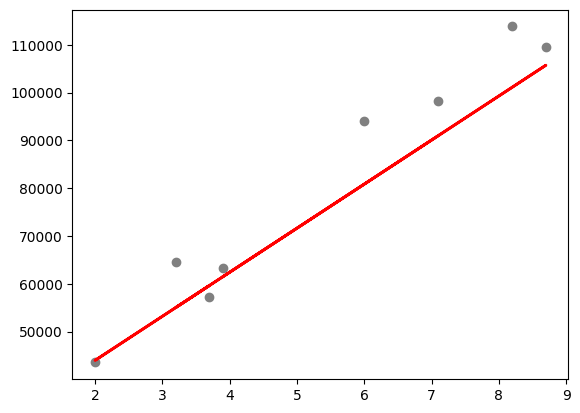

Prediction: years: [5.5] -> salary: [76218.81323549]


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv")
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, 1].values, test_size=0.25)
regression = LinearRegression()
regression.fit(x_train, y_train)
print(f"Intercept: {regression.intercept_}")
print(f"Coefficient: {regression.coef_[0]}")
y_pred = regression.predict(x_test)
plt.scatter(x_test, y_test, color="gray")
plt.plot(x_test, y_pred, color="red", lw=2)
plt.show()
years = np.array([5.5]).reshape(1, -1)
print(f"Prediction: years: {years[0]} -> salary: {regression.predict(years)}")

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, -1].values, test_size=0.25)
regression = LinearRegression()
regression.fit(x_train, y_train)
print(f"Accuracy: {regression.score(x_test, y_test)}")
prediction = np.array(df.iloc[20, :-1]).reshape(1, -1)
print(f"Prediction: parameters: {prediction[0]} -> quality: {regression.predict(prediction)}")

Accuracy: 0.3312547607382007
Prediction: parameters: [ 8.9     0.22    0.48    1.8     0.077  29.     60.      0.9968  3.39
  0.53    9.4   ] -> quality: [5.5155011]


Linear regression coefficients: [4.42857143 1.14285715]
Standart deviation for linear regression: 0.7171371656006361
Quadratic regression coefficients: [ 5.14285715 -4.21428577  5.35714293]
Standart deviation for quadratic regression: 0.4780914437337573
0.0 -> 5.142857146236664
0.2 -> 4.514285708760618
0.4 -> 4.314285705520607
0.6 -> 4.542857136516631
0.8 -> 5.20000000174869
1.0 -> 6.2857143012167835


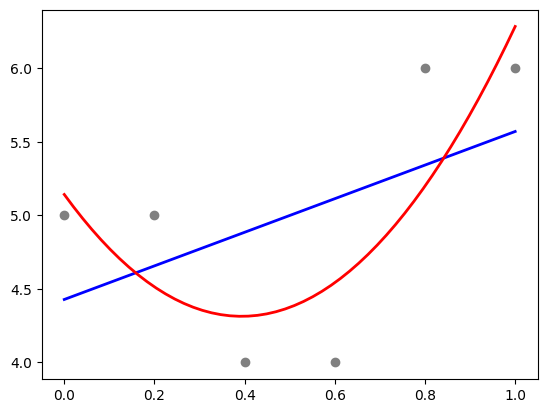

In [21]:
def f1(x, b0, b1):
    return b0 + b1*x

def f2(x, b0, b1, b2):
    return b0 + b1*x + b2*x**2

x_data = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y_data = np.array([5.0, 5.0, 4.0, 4.0, 6.0, 6.0])
x = np.linspace(0.0, 1.0, 50)
plt.scatter(x_data, y_data, color="gray")

coeff_opt, coeff_cov = sp.optimize.curve_fit(f1, x_data, y_data)
print(f"Linear regression coefficients: {coeff_opt}")
residuals = y_data - f1(x_data, *coeff_opt)
sd = (1/len(x_data) * sum(residuals**2))**0.5
print(f"Standart deviation for linear regression: {sd}")
plt.plot(x, f1(x, *coeff_opt), "b", lw=2)

coeff_opt, coeff_cov = sp.optimize.curve_fit(f2, x_data, y_data)
print(f"Quadratic regression coefficients: {coeff_opt}")
residuals = y_data - f2(x_data, *coeff_opt)
sd = (1/len(x_data) * sum(residuals**2))**0.5
print(f"Standart deviation for quadratic regression: {sd}")
plt.plot(x, f2(x, *coeff_opt), "r", lw=2)

for i in x_data:
    print(f"{i} -> {f2(i, *coeff_opt)}")

plt.show()
